In [1]:
from google.colab import files

In [2]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.4 MB/s eta 0:00:00


In [3]:
import patoolib

In [4]:
patoolib.extract_archive('car dataset.zip')

INFO patool: Extracting car dataset.zip ...
INFO:patool:Extracting car dataset.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_2vo853w9 -- "car dataset.zip"
INFO:patool:running /usr/bin/7z x -o./Unpack_2vo853w9 -- "car dataset.zip"
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... car dataset.zip extracted to `Cars Dataset'.
INFO:patool:... car dataset.zip extracted to `Cars Dataset'.


'Cars Dataset'

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import HTML

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 128

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)

# Update the path to your train dataset directory
dataset_directory = '/content/Cars Dataset/train'

train_generator = train_datagen.flow_from_directory(
        dataset_directory,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        class_mode="sparse",
)


Found 3352 images belonging to 7 classes.


In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.0509804  0.04705883 0.07266276]
  [0.05197312 0.05003698 0.07843138]
  [0.06722827 0.06546077 0.07653502]
  ...
  [0.01568628 0.01176471 0.03529412]
  [0.01568628 0.01176471 0.03529412]
  [0.01568628 0.01176471 0.03529412]]

 [[0.0509804  0.04705883 0.07148403]
  [0.05138375 0.04826888 0.07843138]
  [0.05956653 0.06133522 0.07771375]
  ...
  [0.01568628 0.01176471 0.03529412]
  [0.01528292 0.01136135 0.03489077]
  [0.01469356 0.01077199 0.0343014 ]]

 [[0.0509804  0.04705883 0.07058824]
  [0.0509804  0.04705883 0.07805935]
  [0.05467141 0.05813188 0.07843138]
  ...
  [0.01199526 0.00807369 0.03160311]
  [0.01176471 0.00784314 0.03137255]
  [0.01176471 0.00784314 0.03137255]]

 ...

 [[0.16931792 0.1340238  0.10657281]
  [0.16401364 0.12871952 0.10126854]
  [0.15917045 0.12387634 0.09642535]
  ...
  [0.11833654 0.08696399 0.04382673]
  [0.194017   0.16227241 0.11932117]
  [0.22868459 0.1890445  0.14997028]]

 [[0.14028236 0.10498824 0.07753725]
  [0.13615681 0.10086269 0.0734117 ]


In [8]:
class_names = list(train_generator.class_indices.keys())
class_names

['Audi',
 'Hyundai Creta',
 'Mahindra Scorpio',
 'Rolls Royce',
 'Swift',
 'Tata Safari',
 'Toyota Innova']

In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/Cars Dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse"
)

Found 813 images belonging to 7 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.1170624  0.19853638 0.31454483]
  [0.07720866 0.22409114 0.32564437]
  [0.0630173  0.2631506  0.36078432]
  ...
  [0.10211468 0.10211468 0.14133038]
  [0.10224257 0.10224257 0.14145826]
  [0.10237044 0.10237044 0.14158614]]

 [[0.11846909 0.1977691  0.31428906]
  [0.0775923  0.22268446 0.32436556]
  [0.06416821 0.26302272 0.36078432]
  ...
  [0.10588236 0.10588236 0.14509805]
  [0.10588236 0.10588236 0.14509805]
  [0.10588236 0.10588236 0.14509805]]

 [[0.11987576 0.19700183 0.31403333]
  [0.07797594 0.22127779 0.32308677]
  [0.06478105 0.26255405 0.36013538]
  ...
  [0.10620277 0.10620277 0.14541845]
  [0.10588236 0.10588236 0.14509805]
  [0.10588236 0.10588236 0.14509805]]

 ...

 [[0.68303066 0.62420714 0.6045993 ]
  [0.6840537  0.6252302  0.60562235]
  [0.68518764 0.626475   0.6070685 ]
  ...
  [0.58838505 0.56485564 0.5726988 ]
  [0.57692605 0.55339664 0.5612398 ]
  [0.57270294 0.54917353 0.5570167 ]]

 [[0.6933026  0.63447905 0.6148712 ]
  [0.69355834 0.6347348  0.61512697]


In [11]:
sz = 128

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
model.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=7, activation='softmax')) # softmax for more than 2

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 96)                2

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [14]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50
)

Epoch 1/50
105/105 [==============================] - 98s 910ms/step - loss: 1.8776 - accuracy: 0.2584 - val_loss: 1.7638 - val_accuracy: 0.3567
Epoch 2/50
105/105 [==============================] - 84s 797ms/step - loss: 1.7301 - accuracy: 0.3484 - val_loss: 1.6084 - val_accuracy: 0.4096
Epoch 3/50
105/105 [==============================] - 83s 786ms/step - loss: 1.5812 - accuracy: 0.4203 - val_loss: 1.4567 - val_accuracy: 0.4649
Epoch 4/50
105/105 [==============================] - 81s 775ms/step - loss: 1.4246 - accuracy: 0.4869 - val_loss: 1.3322 - val_accuracy: 0.5338
Epoch 5/50
105/105 [==============================] - 81s 774ms/step - loss: 1.2932 - accuracy: 0.5453 - val_loss: 1.2372 - val_accuracy: 0.5646
Epoch 6/50
105/105 [==============================] - 84s 802ms/step - loss: 1.1933 - accuracy: 0.5662 - val_loss: 1.1300 - val_accuracy: 0.5941
Epoch 7/50
105/105 [==============================] - 81s 772ms/step - loss: 1.0763 - accuracy: 0.6169 - val_loss: 1.0839 - val_ac

In [15]:
scores = model.evaluate(test_generator)

26/26 [==============================] - 8s 309ms/step - loss: 1.1350 - accuracy: 0.7208


In [16]:
scores

[1.1349653005599976, 0.7207872271537781]

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
type(history.history['loss'])

list

In [19]:
len(history.history['loss'])

50

In [20]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.8775534629821777,
 1.730137825012207,
 1.5812199115753174,
 1.4246152639389038,
 1.2931597232818604]

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

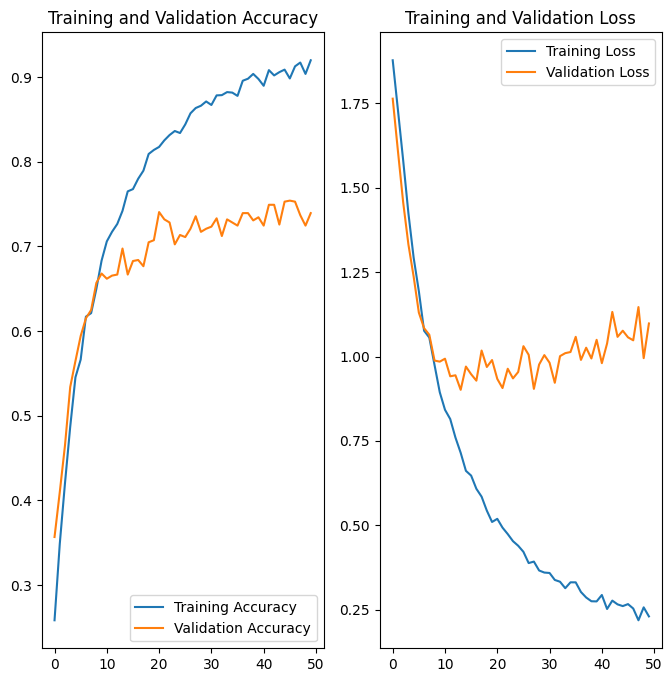

In [22]:
import matplotlib.pyplot as plt
EPOCHS = 50

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 24ms/step


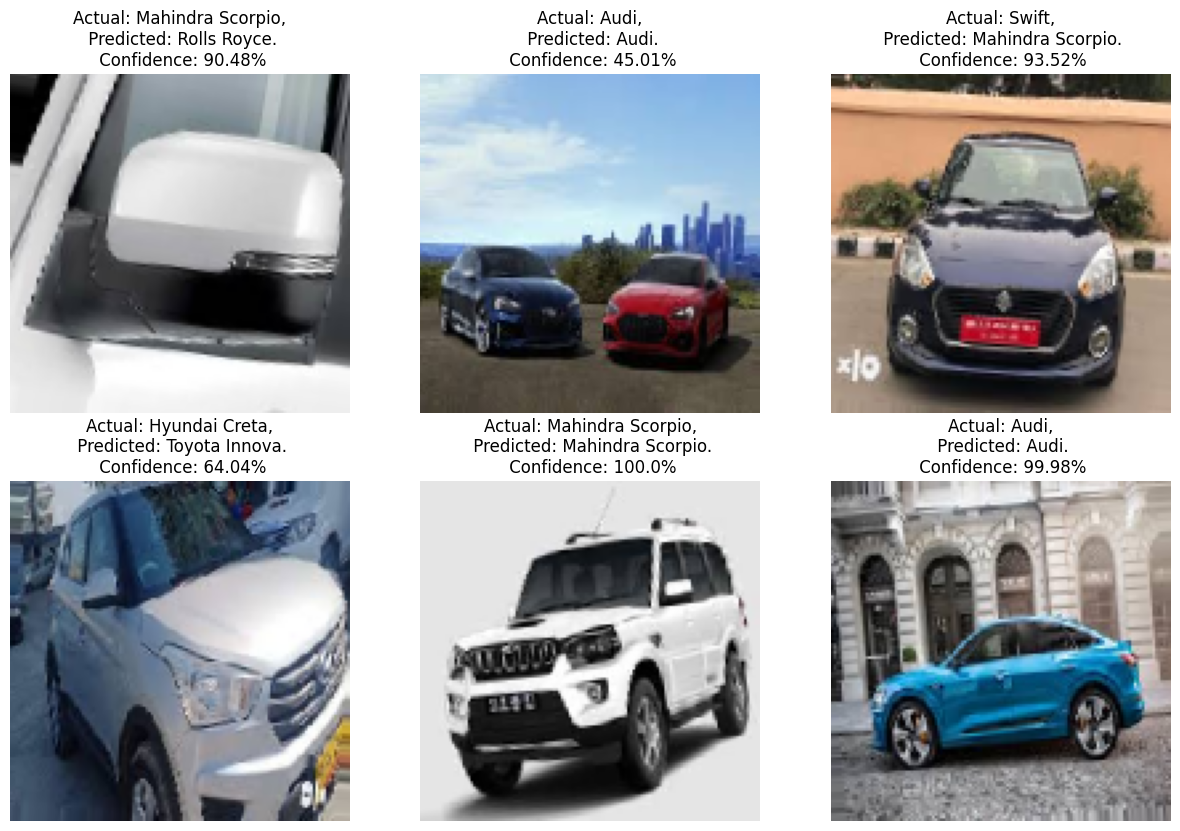

In [24]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")
    break